In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
import matplotlib.animation as animation
from IPython.display import HTML
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [2]:
b=np.array([[2,5,7,9,11,16,19,23,22,29,29,35,37,40,46,42,39,31,30,28,20,15,10,6,3,8,8,9,12,14,15,20,18,23,26,25,27,30,32,31,33,35]]).T
A=np.array([[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]).T

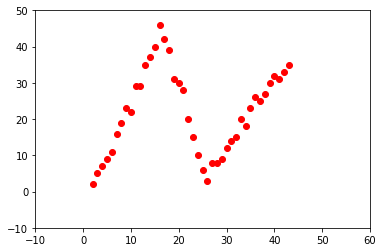

In [3]:
fig1=plt.figure("gradien descent for linear regresstion")
ax=plt.axes(xlim=(-10,60),ylim=(-10,50))
plt.plot(A,b,'ro')

In [4]:
def concatK(k):
    one=np.ones((A.shape[0],1))
    Abar=np.concatenate((one,A),axis=1)
    for i in range(2,k+1,1):
        A_square=np.array([Abar[:,1]**i]).T
        Abar=np.concatenate((Abar,A_square),axis=1)
    return Abar
Abar=concatK(3)
X=np.dot(Abar.T,Abar)
y=np.dot(Abar.T,b)
w=np.dot(np.linalg.pinv(X),y)
w

array([[-2.00876378e+01],
       [ 8.67223405e+00],
       [-4.47741425e-01],
       [ 6.53839763e-03]])

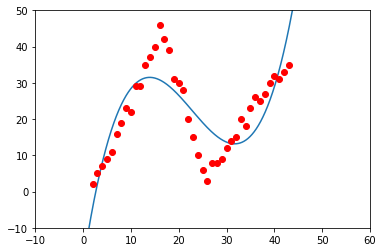

In [6]:
fig1=plt.figure("gradien descent for linear regresstion")
ax=plt.axes(xlim=(-10,60),ylim=(-10,50))
x0_gd=np.linspace(1,50,10000)
y0=w[0][0]+w[1][0]*x0_gd+w[2][0]*x0_gd**2+w[3][0]*x0_gd**3
plt.plot(x0_gd,y0)
plt.plot(A,b,'ro')

In [7]:
def cost(x):
    m=A.shape[0]
    return 0.5/m*np.linalg.norm(A.dot(x)-b,2)**2


def grad(x):
    m=A.shape[0]
    return 1/m*A.T.dot(A.dot(x)-b)

#KIỂM TRA ĐẠO HÀM
def check_grad(x):
    eps=1e-4
    g=np.zeros_like(x)
    for i in range(len(x)):
        x1=x.copy()
        x2=x.copy()
        x1[i]+=eps
        x2[i]-=eps
        g[i]=(cost(x1)-cost(x2))/(2*eps)

    g_rad=grad(x)
    if np.linalg.norm(g-g_rad) >1e-5:
        print("wrong!!")
    else:
        print("correct")
    
def gradient_descent(x_init,learning_rate,iteration):
    x_list=[x_init]
    m=A.shape[0]
    for i in range(iteration):
        x_new=x_list[-1]-learning_rate*grad(x_list[-1])
        if np.linalg.norm(grad(x_new))/m <0.001:
            break
        x_list.append(x_new)
    return x_list

KeyboardInterrupt: 

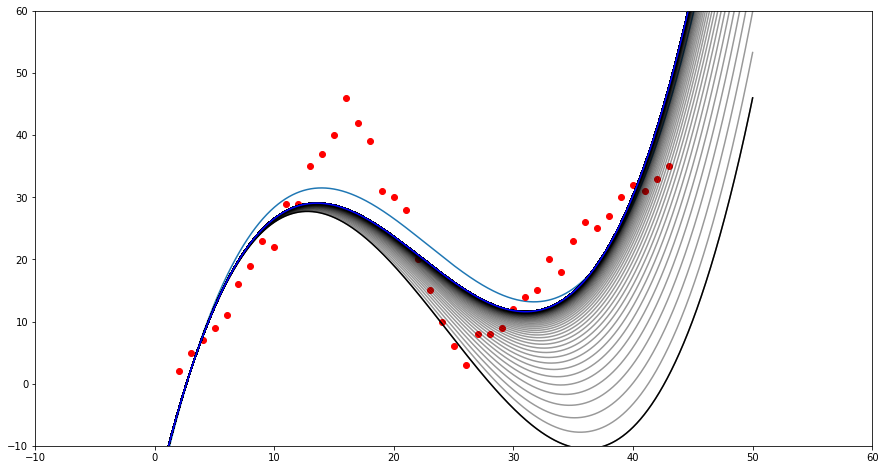

In [8]:
fig1=plt.figure("gradien descent for linear regresstion",figsize=(15,8))
ax=plt.axes(xlim=(-10,60),ylim=(-10,60))
x_init=np.array([[-19.],[8.3],[-0.44],[0.006]])
y0_init=x_init[0][0]+x_init[1][0]*x0_gd+x_init[2][0]*x0_gd**2+x_init[3][0]*x0_gd**3
plt.plot(x0_gd,y0)
plt.plot(A,b,'ro')
plt.plot(x0_gd,y0_init,color='black')

one=np.ones((A.shape[0],1))
A=np.concatenate((one,A),axis=1)
A_square=np.array([A[:,1]**2]).T
A=np.concatenate((A,A_square),axis=1)
A_square=np.array([A[:,1]**3]).T
A=np.concatenate((A,A_square),axis=1)

iteration=1000
learning_rate=0.0000000001
x_list=gradient_descent(x_init,learning_rate,iteration)
for i in range(len(x_list)):
    y0_x_list=x_list[i][0]+x_list[i][1]*x0_gd+x_list[i][2]*x0_gd**2 + x_list[i][3]*x0_gd**3
    plt.plot(x0_gd,y0_x_list,color='black',alpha=0.4)

line , =ax.plot([],[],color='blue')
def update(i):
    y0_gd=x_list[i][0][0]+x_list[i][1][0]*x0_gd+x_list[i][2]*x0_gd**2+x_list[i][3]*x0_gd**3
    line.set_data(x0_gd,y0_gd)
    return line,
iters=np.arange(1,len(x_list),1)
line_a=animation.FuncAnimation(fig1,update,iters,interval=50,blit=True)
# plt.legend(("value in each gd iteration",'solution by formular','inital value for gd'),loc=(0.52,0.01))
# ltext=plt.gca().get_legend().get_texts()
HTML(line_a.to_jshtml())

In [ ]:
x_list

[array([[-1.9e+01],
        [ 8.3e+00],
        [-4.4e-01],
        [ 6.0e-03]]),
 array([[-1.90000000e+01],
        [ 8.30000005e+00],
        [-4.39998405e-01],
        [ 6.05840221e-03]]),
 array([[-1.90000000e+01],
        [ 8.30000009e+00],
        [-4.39996967e-01],
        [ 6.11095081e-03]]),
 array([[-1.90000000e+01],
        [ 8.30000012e+00],
        [-4.39995671e-01],
        [ 6.15823251e-03]]),
 array([[-1.90000000e+01],
        [ 8.30000016e+00],
        [-4.39994502e-01],
        [ 6.20077518e-03]]),
 array([[-1.90000000e+01],
        [ 8.30000019e+00],
        [-4.39993447e-01],
        [ 6.23905382e-03]]),
 array([[-1.90000000e+01],
        [ 8.30000021e+00],
        [-4.39992495e-01],
        [ 6.27349580e-03]]),
 array([[-1.90000000e+01],
        [ 8.30000024e+00],
        [-4.39991635e-01],
        [ 6.30448566e-03]]),
 array([[-1.90000000e+01],
        [ 8.30000026e+00],
        [-4.39990859e-01],
        [ 6.33236940e-03]]),
 array([[-1.90000000e+01],
        [ 8